In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns

##### First look at our preprocessed dataset

In [31]:
file_path = "data/climate_videos_new.jsonl"
climate_videos_df = pd.read_json(file_path, lines=True)

<Axes: xlabel='categories'>

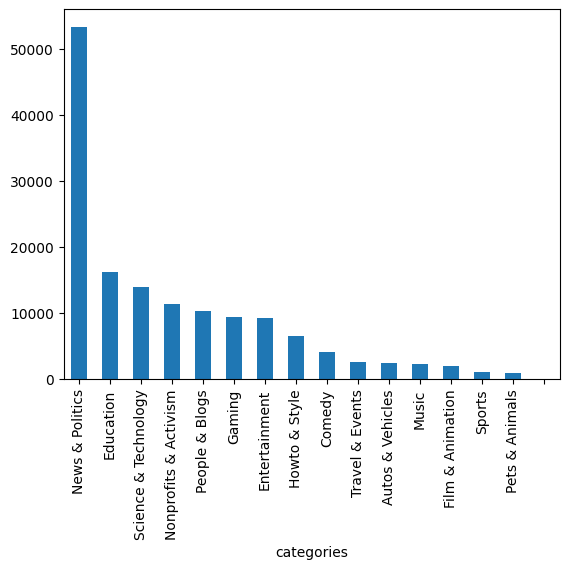

In [33]:
category_counts = climate_videos_df['categories'].value_counts()
category_counts.plot(kind='bar')


Suspicious categories : gaming ?

+ Show that some tite/description do not correspond to climate change related topics

# Filtering refinement

In [82]:
categories = category_counts.reset_index()['categories']

for category in categories:
    print(category)
    print(climate_videos_df[
            climate_videos_df['categories'] == category][
                ['title','description','tags']].head(3))

News & Politics
                                      title  \
204                          GLOBAL WARMING   
205   Al Gore's Paranoia is Getting Worse 😂   
206  Bill Nye: Jail Global Warming Skeptics   

                                           description  \
204  Order your “Liberalism: Find a Cure” or shirts...   
205  CNN had a Town Hall meeting with Al Gore calle...   
206  (((Subscribe))) now for more! http://bit.ly/1Q...   

                                                  tags  
204  2018,Global Warming,Climate Change,Painting St...  
205  Al Gore,Climate Crisis,CNN Town Hall,Al Gore T...  
206  Mark Dice (Person),Bill Nye,Global Warming,Jai...  
Education
                                                 title  \
200  Global warming/ climate change -save planet earth   
342                          Introduction to Economics   
343                       Cap and Trade vs. Carbon Tax   

                                           description  \
200  More than providing entertai

# First analysis and deductions

For each channel we count the number of videos related to climate change

In [35]:
channels_path = 'data/df_channels_en.tsv'

counts = climate_videos_df['channel_id'].value_counts().reset_index()
counts.columns = ['channel','count_climate_videos']

channels_df = pd.read_csv(channels_path, delimiter='\t')

channels_df = channels_df.merge(counts, on ='channel', how ='left').fillna(0)
channels_df['proportion_climate_videos'] = channels_df['count_climate_videos']/channels_df['videos_cc']

display(channels_df)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,count_climate_videos,proportion_climate_videos
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.0870,0.0,0.000000
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.0870,0.0,0.000000
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.0870,7.0,0.000214
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870,13.0,0.003620
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.0870,4.0,0.000092
...,...,...,...,...,...,...,...,...,...,...
136465,Music,2016-10-06,UCuM-9AajUOwKw6ipOzu2DRQ,GONE.Fludd - Topic,10128,105,1008139.0,53.1435,0.0,0.000000
136466,People & Blogs,2013-10-17,UCtW9jp5TH0YrgYpwiRf9t-Q,saidthestory,10100,352,1008644.0,53.1435,0.0,0.000000
136467,Gaming,2015-05-08,UCTsxFTIUs8vFDzGccDm6i7Q,Omni H,10000,475,1009505.0,53.1435,0.0,0.000000
136468,Music,2011-04-13,UC1HOArgRCMGPjlcmkThERwA,TĀLĀ,10000,15,1025119.0,53.1435,0.0,0.000000


In [36]:
display(channels_df.sort_values(by =  'count_climate_videos', ascending= False))

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,count_climate_videos,proportion_climate_videos
87,Nonprofits & Activism,2009-06-23,UCsT0YIqwnpJCM-mx7-gSA4Q,TEDx Talks,20700000,141627,140.0,2.0870,3252.0,0.022962
98565,Comedy,2007-06-21,UCtYjvLEq6FCTWHUX_qtDJpw,paul8kangas,22900,11955,536584.0,9.0000,2784.0,0.232873
37422,Education,2014-07-23,UCp_ShZAUGtFLpYkgcTrayRQ,The Real Truth About...,120000,1597,129397.0,3.9720,1509.0,0.944897
10659,News & Politics,2006-05-21,UC5O114-PQNYkurlTg6hekZw,United Nations,446000,10014,28118.0,3.0245,1215.0,0.121330
13000,Education,2013-09-07,UC6ZQ-SuhvQAeQIR5tHJGGmQ,The Audiopedia,421000,46019,35394.0,3.2170,1143.0,0.024838
...,...,...,...,...,...,...,...,...,...,...
49054,Film and Animation,2012-07-16,UCT1Mq1MaOyXa1qHXPT5dUAw,Shigloo,66700,49,187998.0,5.8195,0.0,0.000000
49053,Entertainment,2017-02-26,UCdjL64S-IS84HjDhSc6XZ2A,Geek Climber,67400,59,187989.0,5.8190,0.0,0.000000
49052,Entertainment,2016-12-11,UC1diQQQOrUsGoSzYKPTXv6g,Dhruvi Shah Dance,82374,83,187986.0,5.8200,0.0,0.000000
49049,Music,2017-02-02,UCySGHFeCusNEu7_ChpAJz4Q,Sad Boy Vibes,80400,652,187958.0,5.8170,0.0,0.000000


In [37]:
display(channels_df.sort_values(by =  'proportion_climate_videos', ascending= False))

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,count_climate_videos,proportion_climate_videos
87404,Howto & Style,2010-04-10,UCa5FbtOmZvP0Z6wR4n7jL8w,Guy Brown,26200,625,442228.0,7.1615,621.0,0.993600
36567,News & Politics,2007-05-25,UC9sXw4ZdPEIp6bYGvLW-_iA,vpro documentary,122743,208,126523.0,3.9190,205.0,0.985577
47134,People & Blogs,2017-09-26,UCsaEBhRsI6tmmz12fkSEYdw,Hot Mess,84226,35,177810.0,5.1875,34.0,0.971429
116703,Nonprofits & Activism,2008-06-04,UCId9tO5LYlJKgNQKEzgjYOg,Médecins Sans Front...,14700,1035,704434.0,10.4760,980.0,0.946860
37422,Education,2014-07-23,UCp_ShZAUGtFLpYkgcTrayRQ,The Real Truth About...,120000,1597,129397.0,3.9720,1509.0,0.944897
...,...,...,...,...,...,...,...,...,...,...
49054,Film and Animation,2012-07-16,UCT1Mq1MaOyXa1qHXPT5dUAw,Shigloo,66700,49,187998.0,5.8195,0.0,0.000000
49053,Entertainment,2017-02-26,UCdjL64S-IS84HjDhSc6XZ2A,Geek Climber,67400,59,187989.0,5.8190,0.0,0.000000
49052,Entertainment,2016-12-11,UC1diQQQOrUsGoSzYKPTXv6g,Dhruvi Shah Dance,82374,83,187986.0,5.8200,0.0,0.000000
49049,Music,2017-02-02,UCySGHFeCusNEu7_ChpAJz4Q,Sad Boy Vibes,80400,652,187958.0,5.8170,0.0,0.000000


(array([1.4393e+04, 1.1600e+02, 3.7000e+01, 2.2000e+01, 9.0000e+00,
        1.1000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([9.61788157e-06, 9.93686561e-02, 1.98727694e-01, 2.98086733e-01,
        3.97445771e-01, 4.96804809e-01, 5.96163847e-01, 6.95522885e-01,
        7.94881924e-01, 8.94240962e-01, 9.93600000e-01]),
 <BarContainer object of 10 artists>)

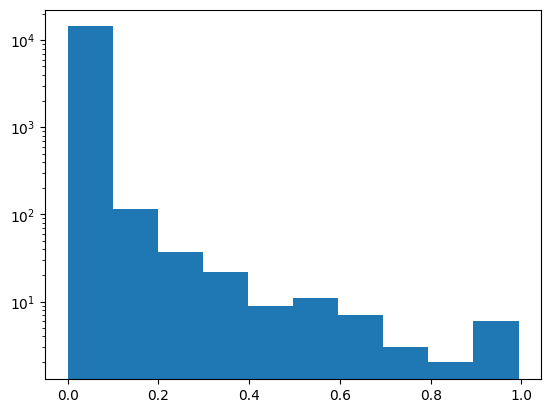

In [38]:
plt.hist(channels_df['proportion_climate_videos'][channels_df['count_climate_videos'] > 0], log = True)

,upload_date,number_of_videos
0,2005-05-29,1
1,2005-06-05,0
2,2005-06-12,0
3,2005-06-19,0
4,2005-06-26,0
...,...,...
752,2019-10-27,50
753,2019-11-03,31
754,2019-11-10,18
755,2019-11-17,26


,upload_date,count
0,2005-07-17,4
1,2005-07-24,2
2,2005-07-31,0
3,2005-08-07,2
4,2005-08-14,0
...,...,...
741,2019-09-29,1779
742,2019-10-06,462
743,2019-10-13,0
744,2019-10-20,0


/Users/paul/anaconda3/envs/ADAenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/paul/anaconda3/envs/ADAenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/paul/anaconda3/envs/ADAenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/paul/anaconda3/envs/ADAenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

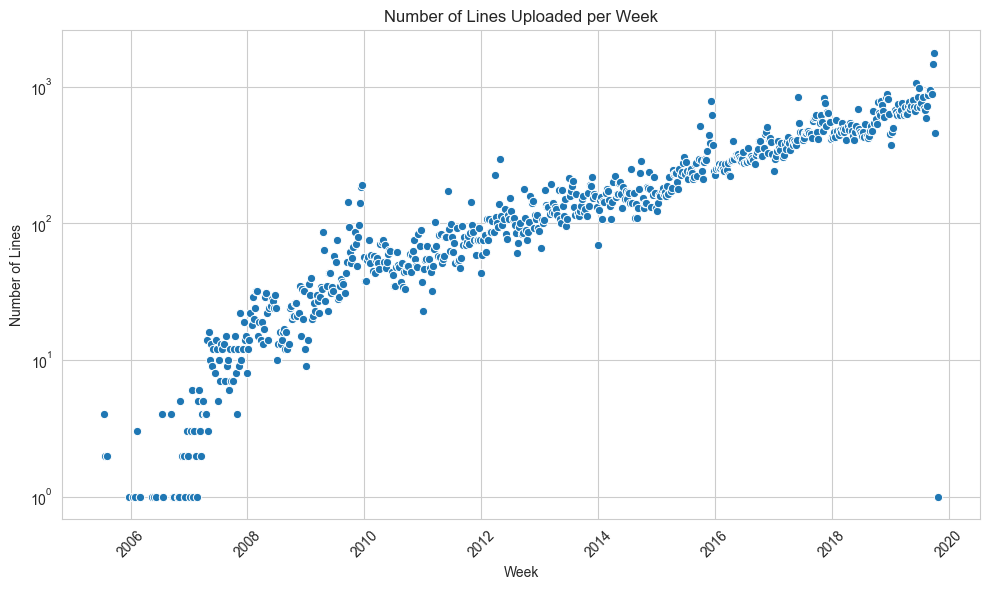

In [92]:
climate_videos_df['upload_date'] = pd.to_datetime(climate_videos_df['upload_date'])

weekly_counts_climate = climate_videos_df.groupby(pd.Grouper(key='upload_date', freq='W')).size().reset_index(name='count')

total_number_videos = pd.read_json("data/nb_videos_by_date.jsonl",lines=True)
total_number_videos.columns = ['upload_date','number_of_videos']
total_number_videos['upload_date'] = pd.to_datetime(total_number_videos['upload_date'])

weekly_counts_total = total_number_videos.groupby(pd.Grouper(key='upload_date', freq='W')).sum().reset_index()

display(weekly_counts_total)
display(weekly_counts_climate)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_counts_climate, x='upload_date', y='count', marker='o', linestyle='')

plt.title('Number of Lines Uploaded per Week')
plt.xlabel('Week')
plt.ylabel('Number of Lines')

plt.xticks(rotation=45)
plt.yscale('log')

plt.tight_layout()
plt.show()